# 제비 데이터 분석(근데 머신러닝을 곁들인)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.Train_data

In [12]:
swallow_o_1 = pd.read_csv("./data/sample_data/data_1.txt", sep="\t", encoding='cp949', index_col=0)
swallow_o_1.head()

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-08 10:53:48,9,2023-06-08 20:18:48,9,Midnight,125.690,26.006,-6.0
1,2023-06-08 20:18:48,9,2023-06-09 10:49:48,9,Midday,126.214,25.105,-6.0
2,2023-06-09 10:49:48,9,2023-06-09 20:17:48,9,Midnight,126.363,25.306,-6.0
3,2023-06-09 20:17:48,9,2023-06-10 10:49:48,9,Midday,126.388,25.223,-6.0
4,2023-06-10 10:49:48,9,2023-06-10 20:28:48,9,Midnight,125.038,22.915,-6.0


In [13]:
swallow_o_1.shape

(693, 8)

In [14]:
swallow_o_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, 0 to 692
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   First      693 non-null    object 
 1   Quality_1  693 non-null    int64  
 2   Second     693 non-null    object 
 3   Quality_2  693 non-null    int64  
 4   Type       693 non-null    object 
 5   Longitude  693 non-null    float64
 6   Latitude   614 non-null    float64
 7   ElevAngle  693 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 48.7+ KB


In [15]:
swallow_o_1_c = swallow_o_1.drop(index=0, axis=0)
swallow_o_1.drop(index=692, inplace=True)
swallow_o_1_c.reset_index(inplace=True)

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-08 10:53:48,9,2023-06-08 20:18:48,9,Midnight,125.690,26.006,-6.0
1,2023-06-08 20:18:48,9,2023-06-09 10:49:48,9,Midday,126.214,25.105,-6.0
2,2023-06-09 10:49:48,9,2023-06-09 20:17:48,9,Midnight,126.363,25.306,-6.0
3,2023-06-09 20:17:48,9,2023-06-10 10:49:48,9,Midday,126.388,25.223,-6.0
4,2023-06-10 10:49:48,9,2023-06-10 20:28:48,9,Midnight,125.038,22.915,-6.0
...,...,...,...,...,...,...,...,...
687,2024-05-18 20:23:48,9,2024-05-19 10:29:48,9,Midday,127.425,22.678,-6.0
688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,Midnight,126.932,21.556,-6.0
689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,Midday,125.440,24.422,-6.0


In [16]:
swallow_o_1.drop(columns=['ElevAngle', 'Type'], inplace=True)

In [18]:
swallow_o_1['Longitude_difference'] = swallow_o_1['Longitude'] - swallow_o_1_c['Longitude']
swallow_o_1['Latitude_difference'] = swallow_o_1['Latitude'] - swallow_o_1_c['Latitude']
swallow_o_1.tail()

,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference
Index,,,,,,,,
687,2024-05-18 20:23:48,9,2024-05-19 10:29:48,9,127.425,22.678,0.493,1.122
688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,126.932,21.556,1.492,-2.866
689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,125.440,24.422,-1.132,-2.013
690,2024-05-20 10:41:48,9,2024-05-20 20:18:48,9,126.572,26.435,19.990,-23.567
691,2024-05-20 20:18:48,9,2024-05-21 13:21:48,9,106.582,50.002,23.365,30.442


In [19]:
mean_1 = np.mean(swallow_o_1['Latitude'])
std_1 = np.std(swallow_o_1['Latitude'])
mean_2 = np.mean(swallow_o_1['Longitude'])
std_2 = np.std(swallow_o_1['Longitude'])

swallow_o_1['Latitdue_zlevel'] = (swallow_o_1['Latitude'] - mean_1) / std_1
swallow_o_1['Longitdue_zlevel'] = (swallow_o_1['Longitude'] - mean_2) / std_2

In [20]:
swallow_o_1.dropna(inplace=True)

swallow_o_1.reset_index(inplace=True)

In [21]:
list_a = []

for i in range(605):
    list_a.append(swallow_o_1.iloc[i,1])

In [22]:
list_b = []

for i in list_a:
    list_b.append(int(i[5:7]))

print(list_b)

obj_1 = pd.Series(list_b, name="Month", index=np.arange(605))
print(len(obj_1))

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [37]:
swallow_o_1 = pd.concat([swallow_o_1, obj_1], axis=1)
swallow_o_1

,Index,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference,Latitdue_zlevel,Longitdue_zlevel,Month
0,0,2023-06-08 10:53:48,9,2023-06-08 20:18:48,9,125.690,26.006,-0.524,0.901,0.578449,0.776858,6
1,1,2023-06-08 20:18:48,9,2023-06-09 10:49:48,9,126.214,25.105,-0.149,-0.201,0.515850,0.887336,6
2,2,2023-06-09 10:49:48,9,2023-06-09 20:17:48,9,126.363,25.306,-0.025,0.083,0.529815,0.918750,6
3,3,2023-06-09 20:17:48,9,2023-06-10 10:49:48,9,126.388,25.223,1.350,2.308,0.524048,0.924021,6
4,4,2023-06-10 10:49:48,9,2023-06-10 20:28:48,9,125.038,22.915,-1.275,2.284,0.363695,0.639393,6
...,...,...,...,...,...,...,...,...,...,...,...,...
600,687,2024-05-18 20:23:48,9,2024-05-19 10:29:48,9,127.425,22.678,0.493,1.122,0.347229,1.142657,5
601,688,2024-05-19 10:29:48,9,2024-05-19 20:27:48,9,126.932,21.556,1.492,-2.866,0.269275,1.038715,5
602,689,2024-05-19 20:27:48,9,2024-05-20 10:41:48,9,125.440,24.422,-1.132,-2.013,0.468397,0.724149,5
603,690,2024-05-20 10:41:48,9,2024-05-20 20:18:48,9,126.572,26.435,19.990,-23.567,0.608255,0.962815,5


In [36]:
## month 삭제용

swallow_o_1.drop(columns='Month', inplace=True)

KeyError: "['Month'] not found in axis"

In [39]:
swallow_o_1.drop(columns=["Index", 'Quality_1', 'Quality_2', 'Second'], inplace=True)

In [44]:
swallow_o_1.shape

(605, 8)

In [49]:
swallow_o_1['class'] = np.ones(605)

In [48]:
swallow_o_1.drop(columns='class', inplace=True)

In [50]:
swallow_o_1.to_csv("./data/save_data/chack_first.csv", sep=',', na_rep='NaN')

In [51]:
!cp ./data/save_data/chack_first.csv ../../../../../mnt/c/Users/khj01/OneDrive/문서/data/chack_first.csv

8208.08s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


###  재가공 데이터 분석

In [90]:
swallow_o_1.head()

,First,Longitude,Latitude,Longitude_difference,Latitude_difference,Latitdue_zlevel,Longitdue_zlevel,Month,class
0,2023-06-08 10:53:48,125.690,26.006,-0.524,0.901,0.578449,0.776858,6,1.0
1,2023-06-08 20:18:48,126.214,25.105,-0.149,-0.201,0.515850,0.887336,6,1.0
2,2023-06-09 10:49:48,126.363,25.306,-0.025,0.083,0.529815,0.918750,6,1.0
3,2023-06-09 20:17:48,126.388,25.223,1.350,2.308,0.524048,0.924021,6,1.0
4,2023-06-10 10:49:48,125.038,22.915,-1.275,2.284,0.363695,0.639393,6,1.0


In [89]:
swallow_o_1_n = swallow_o_1.to_numpy()
swallow_o_1_n[:, 3]

array([-0.5240000000000009, -0.1490000000000009, -0.025000000000005684,
       1.3500000000000085, -1.2750000000000057, -1.8999999999999915,
       1.0989999999999895, 0.5990000000000038, 0.09900000000000375,
       0.5990000000000038, 0.47399999999998954, -0.6509999999999962,
       0.09799999999999898, -1.2759999999999962, -0.652000000000001,
       1.222999999999999, -0.902000000000001, 0.597999999999999,
       0.09799999999999898, -0.777000000000001, 0.09799999999999898,
       0.2220000000000084, -0.277000000000001, -0.7770000000000152,
       2.473000000000013, 0.3469999999999942, 22.345, -0.777000000000001,
       -25.399, 0.3480000000000132, 1.597999999999999, 2.097999999999999,
       -1.0260000000000105, 0.2230000000000132, 0.722999999999999,
       0.22399999999998954, 57.21600000000001, -0.4270000000000067,
       -57.16799999999999, 1.4749999999999943, 0.8500000000000085,
       -1.7750000000000057, 0.2259999999999991, -1.649000000000001,
       -1.649000000000001, 2.1009

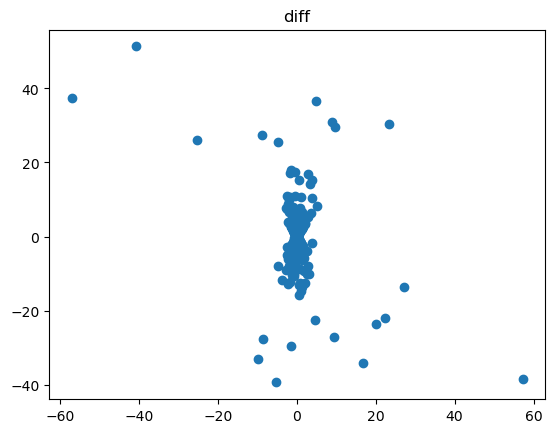

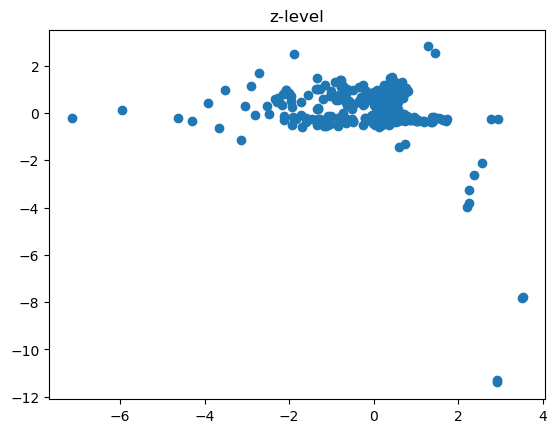

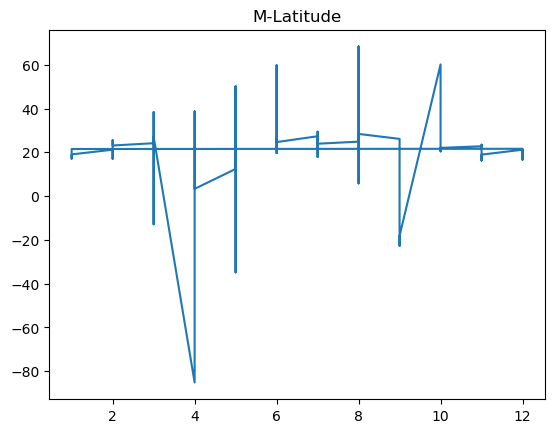

In [96]:
plt.scatter(swallow_o_1_n[:, 3], swallow_o_1_n[:, 4])
plt.title('diff')
plt.show()

plt.scatter(swallow_o_1_n[:, 5], swallow_o_1_n[:, 6])
plt.title('z-level')
plt.show()

plt.plot(swallow_o_1_n[:, 7], swallow_o_1_n[:, 2])
plt.title('M-Latitude')
plt.show()

## 2024-08-23, 10:19 PM 종료

### todo list

- 위도, 경도차를 구해서 결측치 라벨링(결측치가 0, 일반 데이터가 1) *** 중요.  평균을 차한다던가 표준편차를 나눈다던가 하는 식으로 반드시 할것 실패해도 좋음 라벨링 성공만 하면 나머지는 금방 끝남
    - 펑균을 차한값, 표준편차를 나눈 값등등을 모두 활용한다면 좋지 않을까? - 2024/08/25 첨
#### 2024/08/24 - 좋은 아이디어
    - 두 데이터을 일자단위로 구분하여 두 데이터의 차를 구해고 이를 기반으로 라벨링
    - 차가 크면 둘다 삭제(train_data로 쓸꺼니까 상관 X)
    - 라벨링후 오차는 확인할 것(큰 오차가 남아있는 것만 아니면 상관)
    - 이후 이 데이터로 머신러닝 후 그 모델로 원본데이터 분석

#### 2024/08/25 - 굉장히 좋은 아이디어 - 차용, 이후 개발은 이 모델로
    - 일단 위,경도의 차를 모아놓은 데이터를 기반으로 0,1,2 (0은 확실한 결측데이터, 1은 확실하게 결측이 아닌 데이터, 2는 애매한 데이터) 구분
    - class 2는 날려버리고 남은 데이터로 이진분류 모델 훈련
    - 그 모델을 기반으로 다시 원본데이터 분류
    - 분류된 데이터를 기반으로 다시 모델 훈련
        - 그러나 이 과정에서 그대로 다시하면 똑같은 모델이 나올 것이 뻔하기에 일부 데이터는 랜덤히 삭제해서 훈련
        - 이 과정을 수~수십회 반복하면 괜찮은 모델이 나올 것이라고 예측

- 혹시 모를 null값 확인(확인은 끝, 그러나 필요해서 살려두는 중 - 추후 제거 예정 2024/08/25)


- 머신러닝 모델 정하기 (이부분은 뺄까 고민중 - 2024/08/25)

#### 메모 - 2024/08/26
- 첫번째 모델과 두번째 모델을 충분히 분리할 것
- 코딩에 불편함이 있음
- 전처리는 가능하면 수요일까지는 끝내자

## 2.test_data

In [68]:
swallow_o_2 = pd.read_csv("./data/sample_data/data_2.txt", sep='\t', encoding='cp949', index_col=0)
swallow_o_2.head()

,First,Quality_1,Second,Quality_2,Type,Longitude,Latitude,ElevAngle
Index,,,,,,,,
0,2023-06-09 02:18:53,9,2023-06-09 08:20:53,9,Midnight,-80.178,51.083,-6.0
1,2023-06-09 08:20:53,9,2023-06-10 10:43:53,9,Midday,36.730,-72.258,-6.0
2,2023-06-10 10:43:53,9,2023-06-10 20:08:53,9,Midnight,128.267,25.832,-6.0
3,2023-06-10 20:08:53,9,2023-06-11 10:48:53,9,Midday,127.667,26.747,-6.0
4,2023-06-11 10:48:53,9,2023-06-11 20:02:53,9,Midnight,128.442,27.907,-6.0


In [69]:
swallow_o_2.shape

(692, 8)

In [70]:
swallow_o_2_c = swallow_o_2.drop(index=0, axis=0)
swallow_o_2.drop(index=691, inplace=True)
swallow_o_2_c.reset_index(inplace=True)

In [71]:
swallow_o_2.drop(columns=['ElevAngle', 'Type'], inplace=True)

In [72]:
swallow_o_2['Longitude_difference'] = swallow_o_2['Longitude'] - swallow_o_2_c['Longitude']
swallow_o_2['Latitude_difference'] = swallow_o_2['Latitude'] - swallow_o_2_c['Latitude']
swallow_o_2.tail()

,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference
Index,,,,,,,,
686,2024-05-17 11:07:20,9,2024-05-17 20:12:20,9,124.150,33.950,-3.005,5.091
687,2024-05-17 20:12:20,9,2024-05-18 10:43:20,9,127.155,28.859,-0.006,0.124
688,2024-05-18 10:43:20,9,2024-05-18 20:12:20,9,127.161,28.735,-0.006,0.143
689,2024-05-18 20:12:20,9,2024-05-19 10:43:20,9,127.167,28.592,0.368,0.782
690,2024-05-19 10:43:20,9,2024-05-19 20:15:20,9,126.799,27.810,19.117,-22.276


In [73]:
swallow_o_2.dropna(inplace=True)

In [74]:
swallow_o_2.reset_index(inplace=True)

In [75]:
len(swallow_o_2)

641

In [76]:
swallow_o_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 641 non-null    int64  
 1   First                 641 non-null    object 
 2   Quality_1             641 non-null    int64  
 3   Second                641 non-null    object 
 4   Quality_2             641 non-null    int64  
 5   Longitude             641 non-null    float64
 6   Latitude              641 non-null    float64
 7   Longitude_difference  641 non-null    float64
 8   Latitude_difference   641 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 45.2+ KB


In [77]:
list_a = []

for i in range(641):
    list_a.append(swallow_o_2.iloc[i,1])

In [78]:
list_b = []

for i in list_a:
    list_b.append(int(i[5:7]))

print(list_b)

obj_1 = pd.Series(list_b, name="Month", index=np.arange(641))
print(len(obj_1))

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 

In [79]:
swallow_o_2.reset_index(inplace=True)

In [80]:
swallow_o_2 = pd.concat([swallow_o_2, obj_1], axis=1)

In [81]:
swallow_o_2

,index,Index,First,Quality_1,Second,Quality_2,Longitude,Latitude,Longitude_difference,Latitude_difference,Month
0,0,0,2023-06-09 02:18:53,9,2023-06-09 08:20:53,9,-80.178,51.083,-116.908,123.341,6
1,1,1,2023-06-09 08:20:53,9,2023-06-10 10:43:53,9,36.730,-72.258,-91.537,-98.090,6
2,2,2,2023-06-10 10:43:53,9,2023-06-10 20:08:53,9,128.267,25.832,0.600,-0.915,6
3,3,3,2023-06-10 20:08:53,9,2023-06-11 10:48:53,9,127.667,26.747,-0.775,-1.160,6
4,4,4,2023-06-11 10:48:53,9,2023-06-11 20:02:53,9,128.442,27.907,0.474,-0.678,6
...,...,...,...,...,...,...,...,...,...,...,...
636,636,686,2024-05-17 11:07:20,9,2024-05-17 20:12:20,9,124.150,33.950,-3.005,5.091,5
637,637,687,2024-05-17 20:12:20,9,2024-05-18 10:43:20,9,127.155,28.859,-0.006,0.124,5
638,638,688,2024-05-18 10:43:20,9,2024-05-18 20:12:20,9,127.161,28.735,-0.006,0.143,5
639,639,689,2024-05-18 20:12:20,9,2024-05-19 10:43:20,9,127.167,28.592,0.368,0.782,5


In [ ]:
## month 삭제용

swallow_o_2.drop(columns='Month', inplace=True)

In [82]:
swallow_o_2.drop(columns=["Index", 'Quality_1', 'Quality_2', 'Second'], inplace=True)

In [84]:
swallow_o_2['class'] = np.ones(641)

In [ ]:
swallow_o_2.drop(columns='class', inplace=True)

In [85]:
swallow_o_2.to_csv('./data/save_data/chack_secend.csv', sep=',', na_rep='NaN')

In [86]:
!cp ./data/save_data/chack_secend.csv ../../../../../mnt/c/Users/khj01/OneDrive/문서/data/chack_secend.csv

9328.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


## sub. 데이터 초기 분석

In [ ]:
### 주의! 여기 건들면 위에꺼 다 무효화

In [ ]:
swallow_o_1 = pd.read_csv("./data/sample_data/data_1.txt", sep="\t", encoding='cp949', index_col=0)
swallow_o_2 = pd.read_csv("./data/sample_data/data_2.txt", sep="\t", encoding='cp949', index_col=0)

In [ ]:
swllow_o = pd.concat([swallow_o_1, swallow_o_2])
swllow_o.shape

In [ ]:
swllow_o.head()

In [ ]:
swllow_data = swllow_o.drop(columns=['ElevAngle', 'Type'])
swllow_data_n = swllow_data.to_numpy()
swllow_data_n[:, 5]

In [ ]:
root = "../original_data/"

plt.scatter(swllow_data_n[:, 5], swllow_data_n[:, 4])
plt.xlabel("Latitude")
plt.ylabel("LongiTude")
plt.show()
# plt.savefig(root + "산점도_결측치_제거되지_않은_위도_경도", dpi=300)